In [1]:
from func.ultis import decompress_pickle, load_obj
import matplotlib.pyplot as plt

from func.run_pipeline_super_vox import reassign
import numpy as np
from func.plot_utils import colorful_seg, fill_noise

import napari

In [2]:
test_file_names = [
    "65",
    "90",
    "120",
    "135"
]

seg_final_eg_gcn_list = []
seg_final_retrained_list = []
seg_final_gasp_list = []
hand_seg_list = []

for i, test_file in enumerate(test_file_names):
    print(f"test file number: {i}")
    seg_final_eg_gcn = decompress_pickle(f"../../masterthesis_results/HMS/edge_gated_gcn/{test_file}_seg_final.pbz2")
    seg_final_eg_gcn = fill_noise(seg_final_eg_gcn)
    seg_final_eg_gcn_colorful = colorful_seg(seg_final_eg_gcn)

    seg_final_eg_gcn_list.append(seg_final_eg_gcn_colorful)

    seg_final_retrained = decompress_pickle(f"../../masterthesis_results/HMS/original_groupnorm/{test_file}_seg_final.pbz2")
    seg_final_retrained_colorful = colorful_seg(seg_final_retrained)

    seg_final_retrained_list.append(seg_final_retrained_colorful)

    seg_final_gasp = decompress_pickle(f"../../masterthesis_results/HMS/gasp/{test_file}_seg_final.pbz2")
    seg_final_gasp_colorful = colorful_seg(seg_final_gasp.astype(np.int32))

    seg_final_gasp_list.append(seg_final_gasp_colorful)

    # hf = np.load(f"../data/CellSeg_dataset/Ovules_processed_thin_boundary_edge/test/{test_file}.npz")
    # hand_seg = np.array(hf["ins"], dtype=np.float)

    # hand_seg_list.append(hand_seg)

test file number: 0
064655172413793110.086206896551724140.105603448275862070.12715517241379310.150862068965517240.17241379310344830.19396551724137930.215517241379310330.237068965517241380.26077586206896550.284482758620689670.30818965517241380.331896551724137960.355603448275862040.37715517241379310.398706896551724140.418103448275862040.43965517241379310.461206896551724140.48275862068965520.50646551724137930.53017241379310340.55172413793103450.56681034482758620.58836206896551720.6034482758620690.61422413793103450.63146551724137930.65086206896551720.66810344827586210.67241379310344830.68103448275862070.70043103448275870.72198275862068960.74137931034482760.75431034482758620.76293103448275870.78017241379310340.79741379310344830.81465517241379310.82974137931034490.84698275862068960.86637931034482760.88577586206896550.90517241379310340.92241379310344830.94396551724137930.96551724137931040.98491379310344830.00.0203703703703703720.0407407407407407440.061111111111111110.079629629629629630.098148

In [18]:
hand_seg_list = []
len(seg_final_gasp_list)


4

In [19]:
for i, test_file in enumerate(test_file_names):
    hand_seg = np.load(f"../data/CellSeg_dataset/HMS_processed/segmentation/{test_file}/{test_file}_ins.npy")
    hand_seg_list.append(colorful_seg(hand_seg))

In [26]:
raw_img_list = []
for i, test_file in enumerate(test_file_names):
    raw_img = np.load(f"../data/CellSeg_dataset/HMS_processed/raw/{test_file}.npy")
    raw_img_list.append(raw_img)

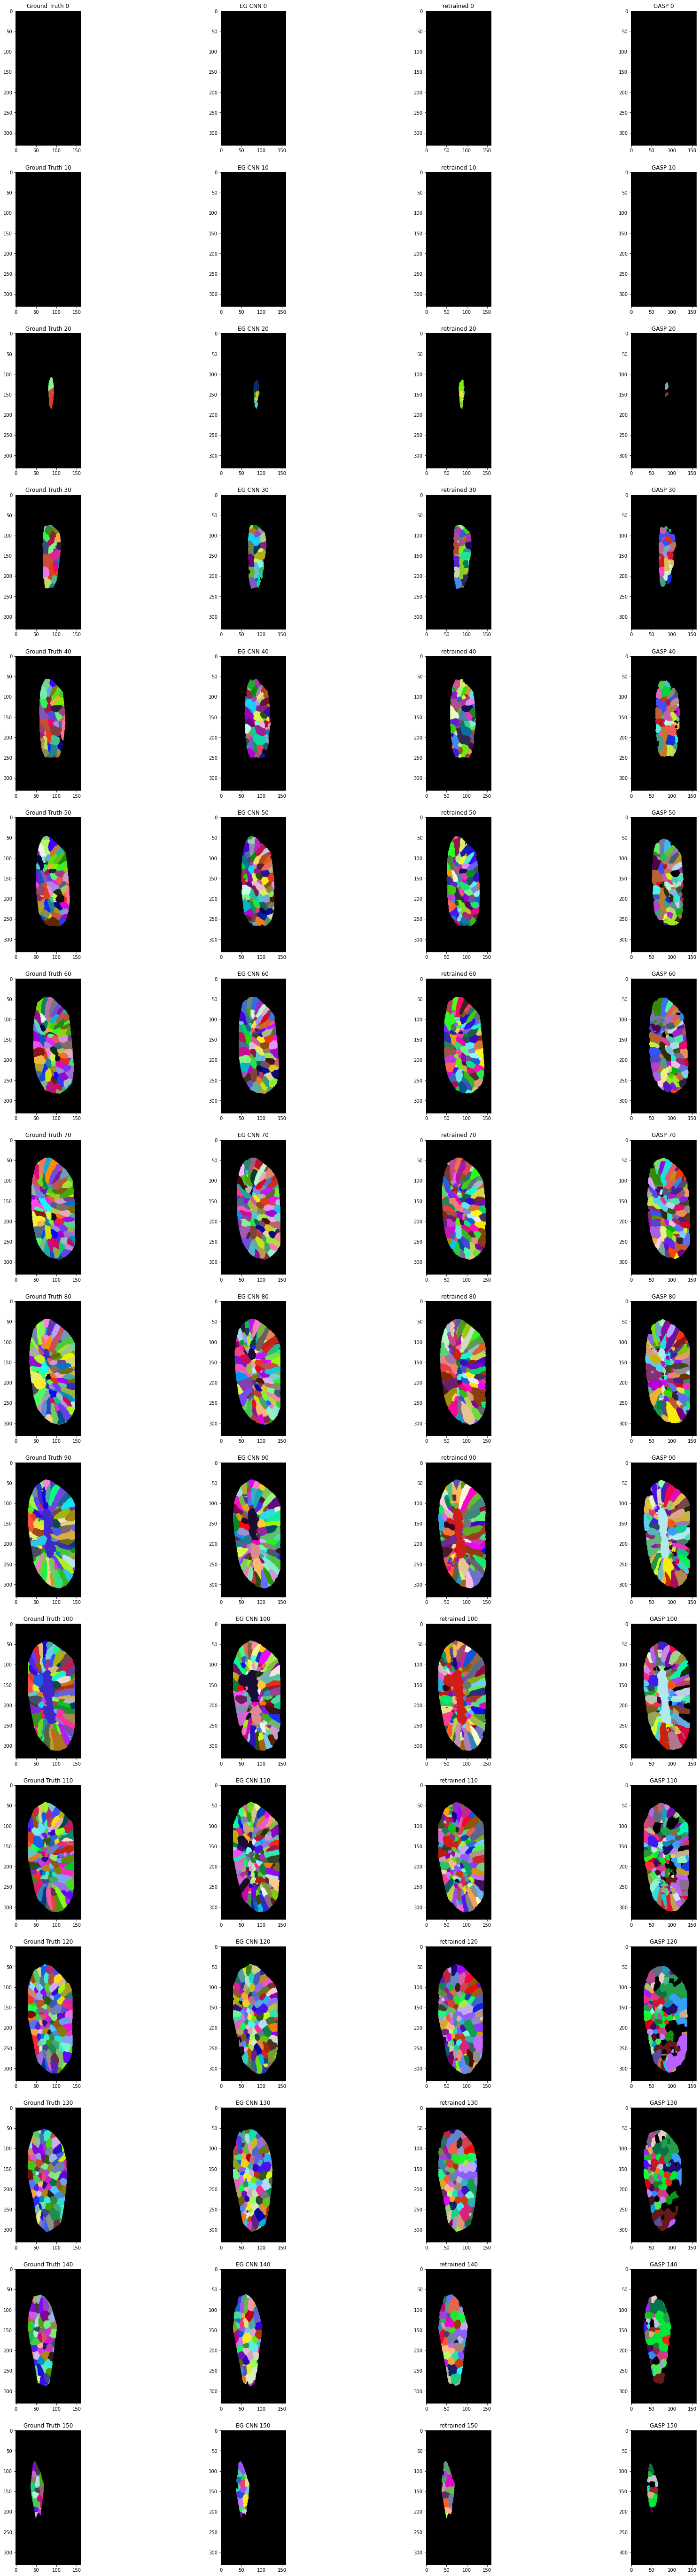

In [20]:
picture_index = 2
fig, axes = plt.subplots(16, 4, figsize=(30, 100))
for index, a in enumerate(axes):
    shown_index = index * 10
    a[0].imshow(hand_seg_list[picture_index][shown_index, ...])
    a[1].imshow(seg_final_eg_gcn_list[picture_index][shown_index, ...])
    a[2].imshow(seg_final_retrained_list[picture_index][shown_index, ...])
    a[3].imshow(seg_final_gasp_list[picture_index][shown_index, ...])

    a[0].set_title(f'Ground Truth {shown_index}')
    a[1].set_title(f'EG CNN {shown_index}')
    a[2].set_title(f'retrained {shown_index}')
    a[3].set_title(f'GASP {shown_index}')

120 auf index 2 scheint gut


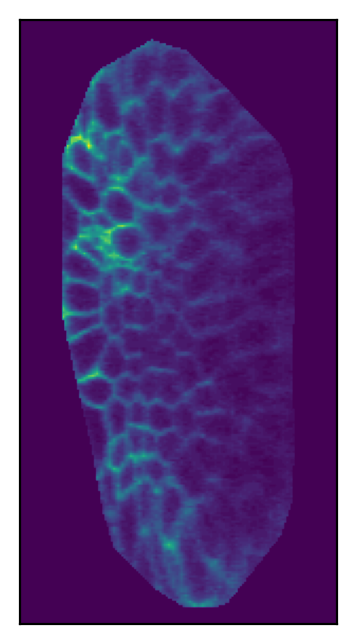

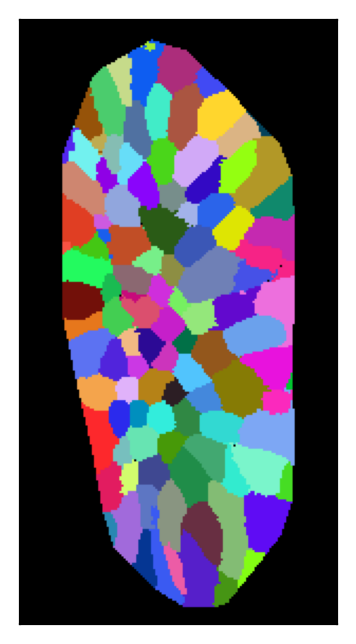

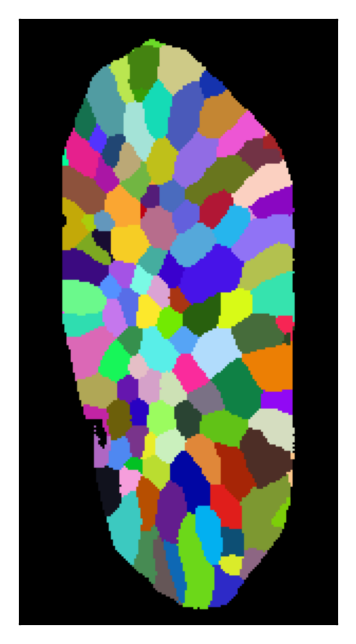

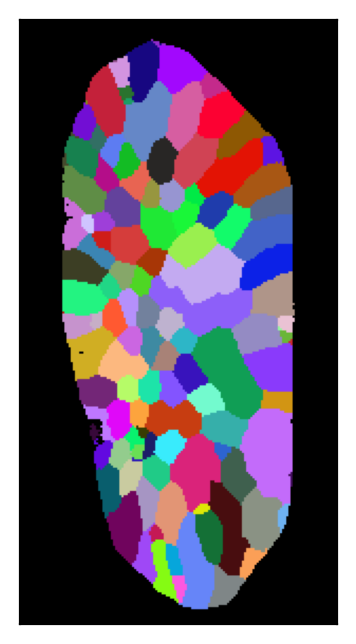

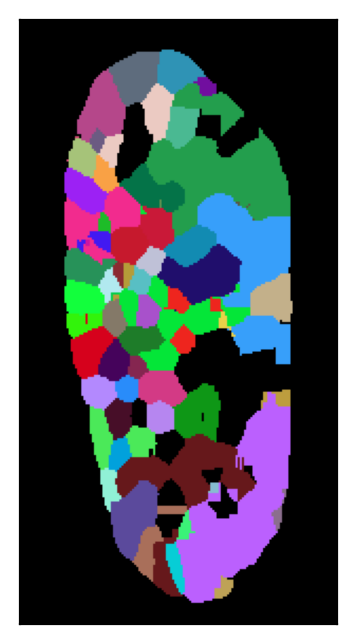

In [32]:
N=120
picture_number = 2

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(raw_img_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/raw_img_hms_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(hand_seg_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/handseg_hms_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_eg_gcn_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/final_seg_eg_gcn_hms_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_retrained_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/final_retrained_hms_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(seg_final_gasp_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/final_seg_gasp_hms_1.pdf", bbox_inches='tight')

In [35]:
boundary_eg_list = []
boundary_retrained_list = []
boundary_gasp_list = []
boundary_gt_list = []


for i, test_file in enumerate(test_file_names):
    boundary_eg = decompress_pickle(f"../../masterthesis_results/HMS/edge_gated_gcn/{test_file}_seg_img_boundary.pbz2")
    boundary_eg_list.append(boundary_eg)

    boundary_retrained = decompress_pickle(f"../../masterthesis_results/HMS/original_groupnorm/{test_file}_seg_img_boundary.pbz2")
    boundary_retrained_list.append(boundary_retrained)

    boundary_gasp = decompress_pickle(f"../../masterthesis_results/HMS/gasp/{test_file}_seg_img_boundary.pbz2")
    boundary_gasp_list.append(boundary_gasp)

    boundary_gt = np.load(f"../data/CellSeg_dataset/HMS_processed/segmentation/{test_file}/{test_file}_boundary_3d_mask.npy")
    boundary_gt_list.append(colorful_seg(boundary_gt))

In [43]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

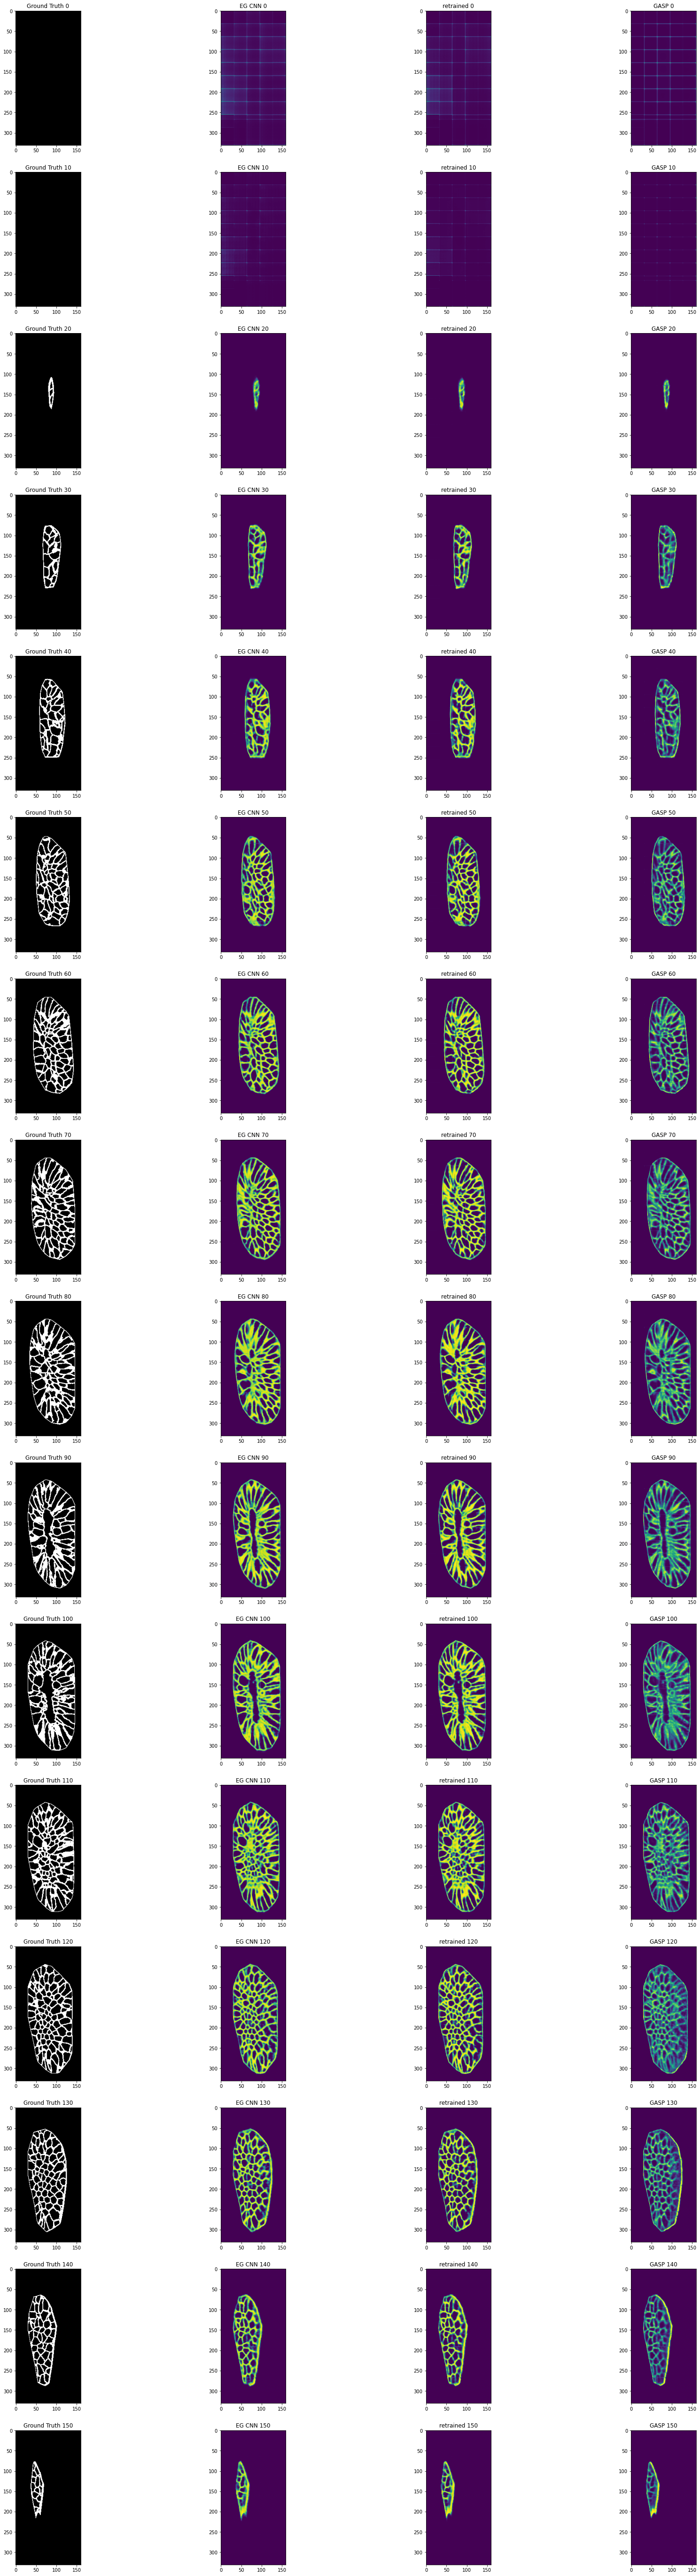

In [51]:
picture_index = 2
fig, axes = plt.subplots(16, 4, figsize=(30, 100))
for index, a in enumerate(axes):
    shown_index = index * 10
    a[0].imshow(normalize_data(boundary_gt_list[picture_index])[shown_index, ...].astype(float)*100)
    a[1].imshow(boundary_eg_list[picture_index][shown_index, ...])
    a[2].imshow(boundary_retrained_list[picture_index][shown_index, ...])
    a[3].imshow(boundary_gasp_list[picture_index][shown_index, ...])

    a[0].set_title(f'Ground Truth {shown_index}')
    a[1].set_title(f'EG CNN {shown_index}')
    a[2].set_title(f'retrained {shown_index}')
    a[3].set_title(f'GASP {shown_index}')

bild 2 slice 90 zeigt, dass eg cnn besser zellräume abschließt

In [46]:
np.max(normalize_data(boundary_gt_list[2]))

1.0

In [45]:
np.min(boundary_retrained_list[0])

1.0921959712507923e-10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


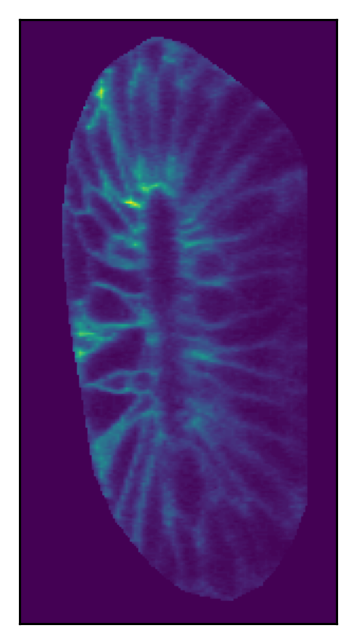

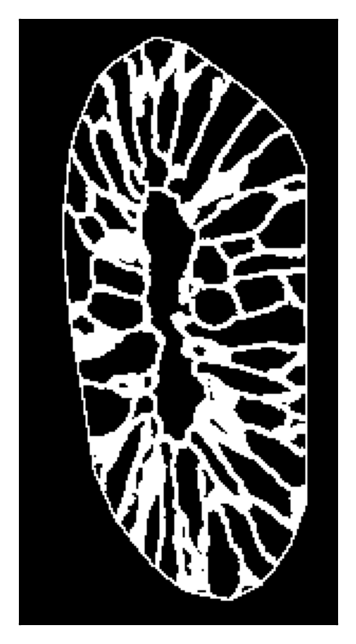

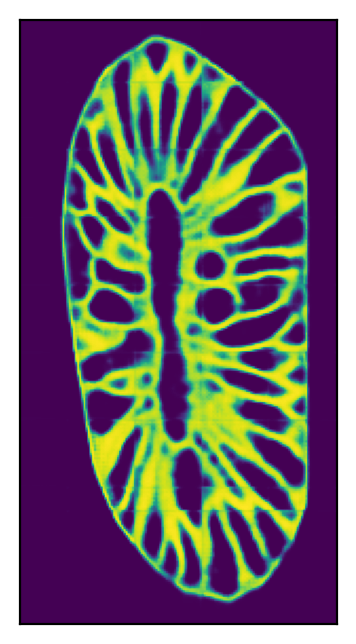

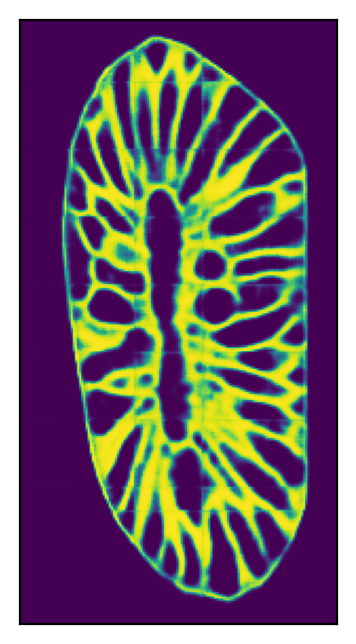

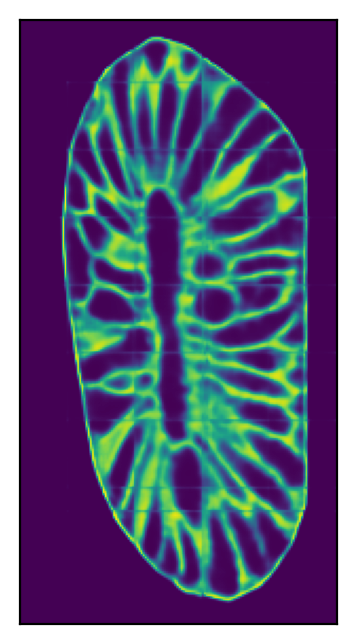

In [53]:
N = 90

picture_number = 2

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(raw_img_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/boundary_raw_hms_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(boundary_gt_list[picture_number][N, 35:-10, 10:]*1000)
plt.savefig("outputs/boundary_gt_hms_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(boundary_eg_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/boundary_eg_gcn_hms_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(boundary_retrained_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/boundary_retrained_hms_1.pdf", bbox_inches='tight')

plt.figure(dpi=200)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(boundary_gasp_list[picture_number][N, 35:-10, 10:])
plt.savefig("outputs/boundary_gasp_hms_1.pdf", bbox_inches='tight')

In [54]:

boundary_gasp_list[picture_number].shape

(181, 331, 160)